# Experiment 1

## Part 1: To solve the system of equations for

    2x+3y=6
    -4x+y=-8
using matrix method

In [3]:
import numpy as np

# Coefficient matrix A
A = np.array([
    [2, 3],
    [-4, 1]
])

# Constant matrix B
B = np.array([6, -8])

# Solve the system AX = B
X = np.linalg.solve(A, B)

print("Solution:")
print(f"x = {X[0]}")
print(f"y = {X[1]}")


Solution:
x = 2.142857142857143
y = 0.5714285714285714


## Part 2 : Write python code and visualize the method

Solution:
x = 2.142857142857143
y = 0.5714285714285714


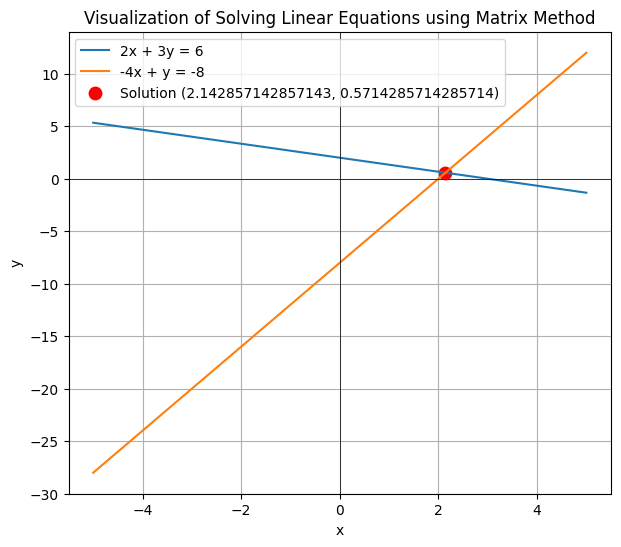

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# System of equations:
# 2x + 3y = 6
# -4x + y = -8

# Coefficient matrix A
A = np.array([[2, 3],
              [-4, 1]])

# Constant matrix B
B = np.array([6, -8])

# Solve the matrix equation AX = B
solution = np.linalg.solve(A, B)
x_sol, y_sol = solution

print("Solution:")
print("x =", x_sol)
print("y =", y_sol)

# -------- Visualization -------- #

# Create x values for plotting
x = np.linspace(-5, 5, 400)

# Convert each equation to y = mx + c form
y1 = (6 - 2*x) / 3        # From 2x + 3y = 6
y2 = -8 + 4*x             # From -4x + y = -8

plt.figure(figsize=(7, 6))

# Plot the two lines
plt.plot(x, y1, label="2x + 3y = 6")
plt.plot(x, y2, label="-4x + y = -8")

# Mark the solution point
plt.scatter(x_sol, y_sol, color='red', s=80, label=f"Solution ({x_sol}, {y_sol})")

# Add labels and grid
plt.xlabel("x")
plt.ylabel("y")
plt.title("Visualization of Solving Linear Equations using Matrix Method")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()

plt.show()


## Part 3 :

Case: Unique intersection (single point)
Coefficient matrix A:
 [[ 1.  1.  1.]
 [ 2. -1.  1.]
 [ 1.  2. -1.]]
Right-hand side b: [3. 0. 1.]
Rank(A): 3 Rank([A|b]): 3
Unique solution: [-0.14285714  1.42857143  1.71428571]

--- Visualizing ---



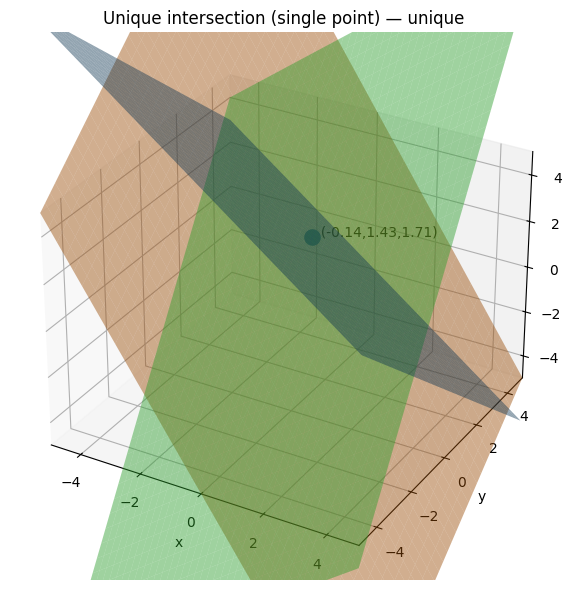

Case: No common intersection (inconsistent)
Coefficient matrix A:
 [[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 1. -1.  0.]]
Right-hand side b: [1. 3. 0.]
Rank(A): 2 Rank([A|b]): 3
No solution (inconsistent system).

--- Visualizing ---



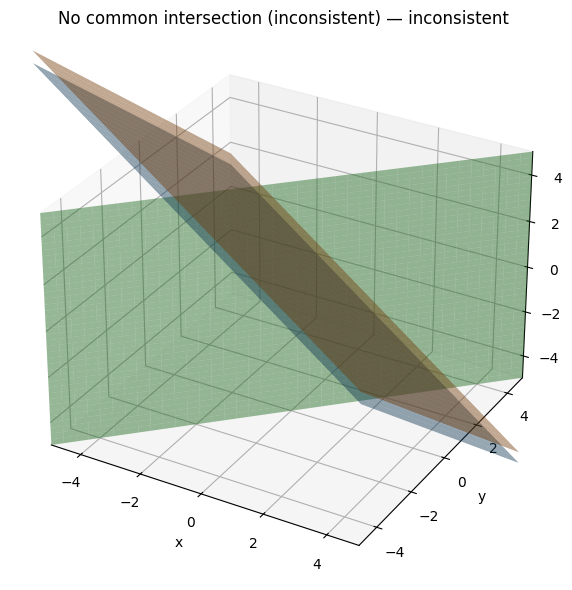

Case: Infinitely many solutions - line (two same planes)
Coefficient matrix A:
 [[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 1. -1.  0.]]
Right-hand side b: [4. 8. 0.]
Rank(A): 2 Rank([A|b]): 2
Infinite solutions. Particular solution (one): [1.33333333 1.33333333 1.33333333]
Nullspace basis vectors (columns):
 [[ 0.40824829]
 [ 0.40824829]
 [-0.81649658]]
Nullspace dimension: 1

--- Visualizing ---



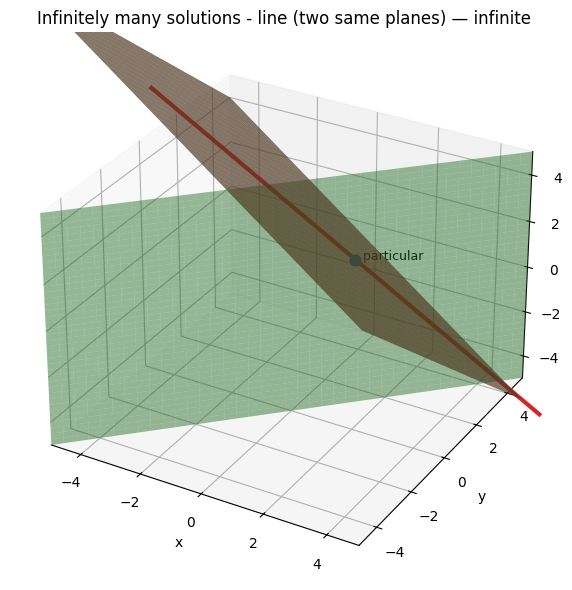

Case: Infinitely many solutions - plane (all same plane)
Coefficient matrix A:
 [[ 1.  2. -1.]
 [ 2.  4. -2.]
 [ 3.  6. -3.]]
Right-hand side b: [3. 6. 9.]
Rank(A): 1 Rank([A|b]): 1
Infinite solutions. Particular solution (one): [ 0.5  1.  -0.5]
Nullspace basis vectors (columns):
 [[-0.91287093  0.        ]
 [ 0.36514837  0.4472136 ]
 [-0.18257419  0.89442719]]
Nullspace dimension: 2

--- Visualizing ---



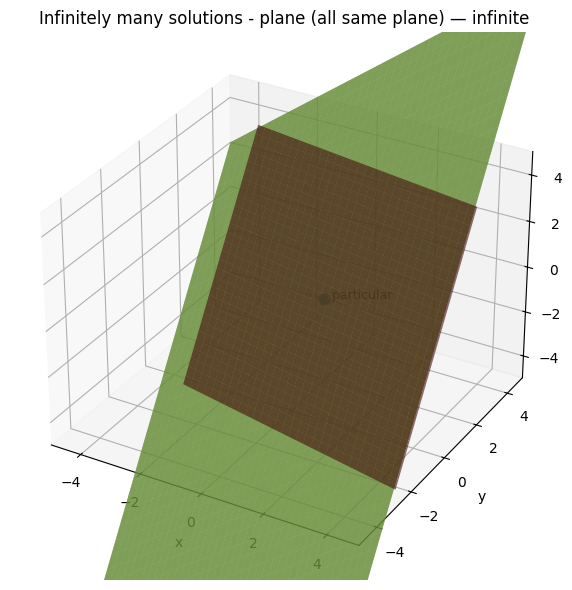

Done. Replace the plane coefficients in the 'cases' dict to test your own examples.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def plane_from_coeffs(coeffs):
    """Return (a,b,c,d) from [a,b,c] and d (so plane: a x + b y + c z = d)."""
    a, b, c = coeffs[0]
    d = coeffs[1]
    return a, b, c, d

def rank_and_solution(A, b, tol=1e-10):
    """Return ranks and classification and solution or paramization."""
    # ranks
    rank_A = np.linalg.matrix_rank(A, tol)
    aug = np.hstack([A, b.reshape(-1,1)])
    rank_aug = np.linalg.matrix_rank(aug, tol)

    result = {"rank_A": rank_A, "rank_aug": rank_aug}

    if rank_A == rank_aug == 3:
        # unique
        x = np.linalg.solve(A, b)
        result.update({"type": "unique", "solution": x})
    elif rank_A != rank_aug:
        result.update({"type": "inconsistent", "solution": None})
    else:
        # rank_A == rank_aug < 3 => infinitely many solutions
        # find particular solution (least squares) and nullspace basis
        x0, *_ = np.linalg.lstsq(A, b, rcond=None)
        # nullspace using SVD
        U, S, Vt = np.linalg.svd(A)
        # nullspace dimension
        null_mask = (S <= tol)
        # but S contains only min(m,n) singular values; better compute nullspace from Vt
        # Determine nullspace vectors as rows of Vt corresponding to zero singular values
        nullspace = Vt.T[:, np.where(S <= tol)[0]] if np.any(S <= tol) else Vt.T[:, np.arange(A.shape[1]-rank_A, A.shape[1])]
        # if above fails, compute nullspace via SVD rank
        if nullspace.size == 0:
            # compute via SVD more robustly
            nullspace = Vt.T[:, rank_A:]
        result.update({"type": "infinite", "particular": x0, "nullspace": nullspace})
    return result

def plot_planes_and_solution(case_name, planes, analysis):
    """
    planes: list of tuples (a,b,c,d) representing a x + b y + c z = d
    analysis: output from rank_and_solution
    """
    # Create grid for plotting planes
    xx, yy = np.meshgrid(np.linspace(-5,5,40), np.linspace(-5,5,40))
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(case_name + " — " + analysis["type"])
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
    ax.set_xlim(-5,5); ax.set_ylim(-5,5); ax.set_zlim(-5,5)

    # Plot planes
    for i, (a,b,c,d) in enumerate(planes):
        # avoid division by zero for c; if c is zero, solve for y instead
        if abs(c) > 1e-8:
            z = (d - a*xx - b*yy) / c
            ax.plot_surface(xx, yy, z, alpha=0.45, linewidth=0, rstride=1, cstride=1)
        elif abs(b) > 1e-8:
            # solve for y: y = (d - a x - c z)/b -> treat z values from mesh as third axis
            zz, xx2 = np.meshgrid(np.linspace(-5,5,40), np.linspace(-5,5,40))
            yy2 = (d - a*xx2 - c*zz) / b
            ax.plot_surface(xx2, yy2, zz, alpha=0.45, linewidth=0)
        else:
            # solve for x: x = d / a (vertical plane)
            x_const = d / a
            yy2, zz2 = np.meshgrid(np.linspace(-5,5,40), np.linspace(-5,5,40))
            xx2 = np.full_like(yy2, x_const)
            ax.plot_surface(xx2, yy2, zz2, alpha=0.45, linewidth=0)

    # Plot according to type
    if analysis["type"] == "unique":
        x, y, z = analysis["solution"]
        ax.scatter([x], [y], [z], s=120)
        ax.text(x, y, z, f"  ({x:.2f},{y:.2f},{z:.2f})", size=10)
    elif analysis["type"] == "inconsistent":
        # No common intersection; nothing extra to plot
        pass
    elif analysis["type"] == "infinite":
        # Determine nullspace dimension
        nullspace = analysis["nullspace"]
        x0 = analysis["particular"].flatten()
        ns_dim = nullspace.shape[1]
        if ns_dim == 1:
            # intersection is a line: param t along nullspace vector
            v = nullspace[:,0].flatten()
            t = np.linspace(-10,10,200)
            line = x0.reshape(3,1) + np.outer(v, t)
            ax.plot(line[0,:], line[1,:], line[2,:], linewidth=3)
            ax.scatter([x0[0]], [x0[1]], [x0[2]], s=60)
            ax.text(x0[0], x0[1], x0[2], "  particular", size=9)
        elif ns_dim == 2:
            # infinite plane of solutions: plot the plane of solutions spanning nullspace vectors
            v1 = nullspace[:,0].flatten()
            v2 = nullspace[:,1].flatten()
            s = np.linspace(-5,5,30)
            t = np.linspace(-5,5,30)
            S, T = np.meshgrid(s,t)
            P = x0.reshape(3,1,1) + v1.reshape(3,1,1)*S + v2.reshape(3,1,1)*T
            ax.plot_surface(P[0,:,:], P[1,:,:], P[2,:,:], alpha=0.6)
            ax.scatter([x0[0]], [x0[1]], [x0[2]], s=60)
            ax.text(x0[0], x0[1], x0[2], "  particular", size=9)

    plt.tight_layout()
    plt.show()

# --- Example cases ---
cases = {
    "Unique intersection (single point)": {
        # planes defined as [(a,b,c), d]
        "planes": [
            (np.array([1, 1, 1]), 3),
            (np.array([2, -1, 1]), 0),
            (np.array([1, 2, -1]), 1)
        ]
    },
    "No common intersection (inconsistent)": {
        # Make two planes parallel but inconsistent, and a third plane that intersects them differently
        "planes": [
            (np.array([1, 1, 1]), 1),
            (np.array([2, 2, 2]), 3),  # inconsistent multiple of first but different RHS
            (np.array([1, -1, 0]), 0)
        ]
    },
    "Infinitely many solutions - line (two same planes)": {
        # First two are multiples (same geometric plane), third intersects them -> intersection is a line
        "planes": [
            (np.array([1, 1, 1]), 4),
            (np.array([2, 2, 2]), 8),  # same plane as first
            (np.array([1, -1, 0]), 0)
        ]
    },
    "Infinitely many solutions - plane (all same plane)": {
        "planes": [
            (np.array([1, 2, -1]), 3),
            (np.array([2, 4, -2]), 6),  # same as first
            (np.array([3, 6, -3]), 9)   # same plane
        ]
    }
}

# Run through examples, analyze and plot
for name, data in cases.items():
    planes = [plane_from_coeffs(p) for p in data["planes"]]
    A = np.vstack([p[0] for p in data["planes"]]).astype(float)
    b = np.array([p[1] for p in data["planes"]], dtype=float)
    analysis = rank_and_solution(A, b)
    print("Case:", name)
    print("Coefficient matrix A:\n", A)
    print("Right-hand side b:", b)
    print("Rank(A):", analysis["rank_A"], "Rank([A|b]):", analysis["rank_aug"])
    if analysis["type"] == "unique":
        sol = analysis["solution"]
        print("Unique solution:", sol)
    elif analysis["type"] == "inconsistent":
        print("No solution (inconsistent system).")
    else:
        x0 = analysis["particular"].flatten()
        ns = analysis["nullspace"]
        print("Infinite solutions. Particular solution (one):", x0)
        print("Nullspace basis vectors (columns):\n", ns)
        print("Nullspace dimension:", ns.shape[1])
    print("\n--- Visualizing ---\n")
    plot_planes_and_solution(name, planes, analysis)

print("Done. Replace the plane coefficients in the 'cases' dict to test your own examples.")


# Experiment 1.2

Uniform (original) Mean: [0.49847358 0.50021585], Median: [0.49835983 0.50027152]


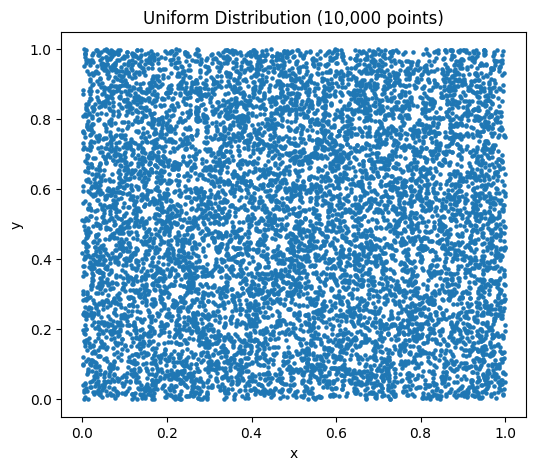

Uniform (with outliers) Mean: [0.49952372 0.50126547], Median: [0.49840754 0.50035836]


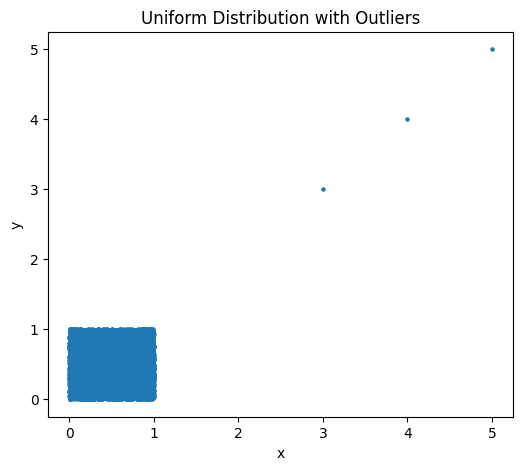

Gaussian (original) Mean: [-0.00449359 -0.00775959], Median: [ 0.00150458 -0.00592736]


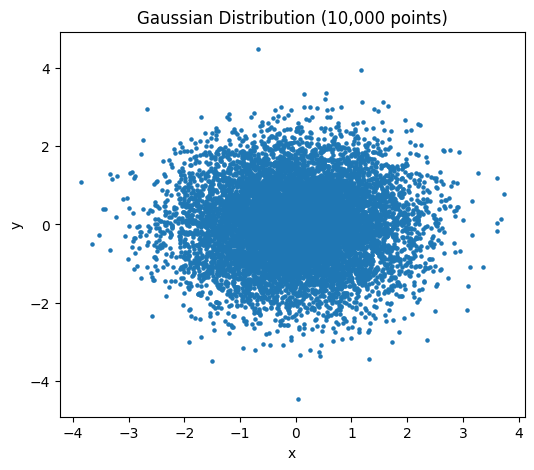

Gaussian (with outliers) Mean: [-0.00329261 -0.00655763], Median: [ 0.00173494 -0.00572284]


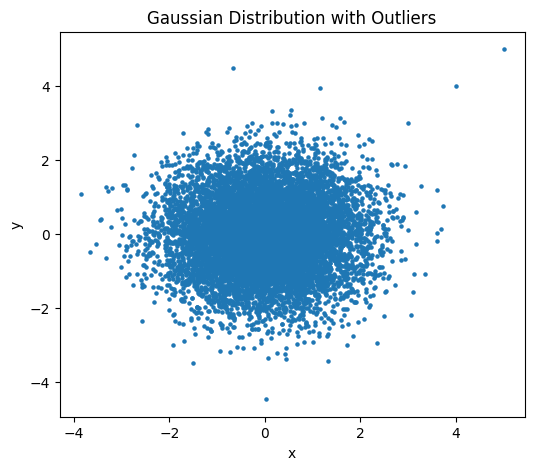

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to compute and print stats
def stats(name, data):
    mean = np.mean(data, axis=0)
    median = np.median(data, axis=0)
    print(f"{name} Mean: {mean}, Median: {median}")
    return mean, median

# ==== A) 2D Uniform Distribution ====
np.random.seed(42)
uniform_points = np.random.uniform(low=0, high=1, size=(10000, 2))

mean_u, median_u = stats("Uniform (original)", uniform_points)

plt.figure(figsize=(6,5))
plt.scatter(uniform_points[:,0], uniform_points[:,1], s=5)
plt.title("Uniform Distribution (10,000 points)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# B) Adding outliers
outliers = np.array([[3,3], [4,4], [5,5]])
uniform_with_outliers = np.vstack([uniform_points, outliers])

mean_u_o, median_u_o = stats("Uniform (with outliers)", uniform_with_outliers)

plt.figure(figsize=(6,5))
plt.scatter(uniform_with_outliers[:,0], uniform_with_outliers[:,1], s=5)
plt.title("Uniform Distribution with Outliers")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# ==== Gaussian Distribution ====
gaussian_points = np.random.normal(loc=0, scale=1, size=(10000, 2))

mean_g, median_g = stats("Gaussian (original)", gaussian_points)

plt.figure(figsize=(6,5))
plt.scatter(gaussian_points[:,0], gaussian_points[:,1], s=5)
plt.title("Gaussian Distribution (10,000 points)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Adding outliers for Gaussian
gaussian_with_outliers = np.vstack([gaussian_points, outliers])

mean_g_o, median_g_o = stats("Gaussian (with outliers)", gaussian_with_outliers)

plt.figure(figsize=(6,5))
plt.scatter(gaussian_with_outliers[:,0], gaussian_with_outliers[:,1], s=5)
plt.title("Gaussian Distribution with Outliers")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


